In [401]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn import metrics

In [2]:
df=pd.read_csv('E:\\datasets\\american\\task\\data.csv')
df.head()

In [3]:
df1=pd.read_csv('E:\\datasets\\american\\__MACOSX\\task\\._data.csv')
df1.head()

# let's see what's the data?

id


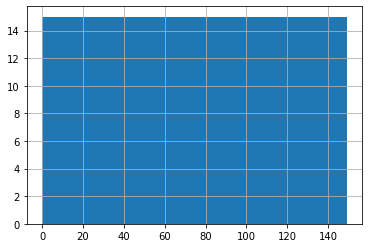

x1


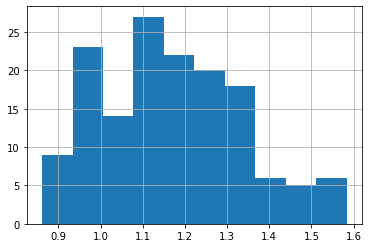

x2


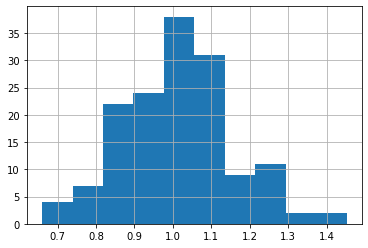

x3


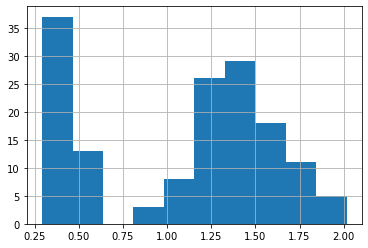

x4


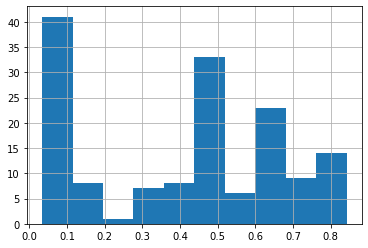

x5


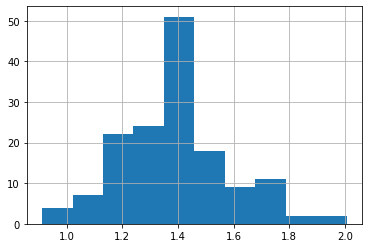

y


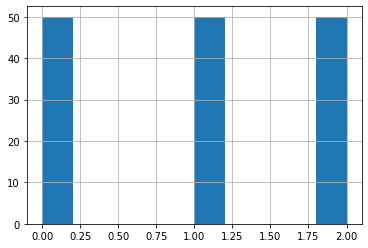

In [21]:
for i in df:
    print (i)
    df[i].hist()
    plt.show()

In [6]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,x1,x2,x3,x4,x5,y
id,1.000000,0.021221,-0.070240,0.056909,0.061758,-0.070240,0.034130
x1,0.021221,1.000000,-0.109369,0.871754,0.817954,-0.109369,0.782561
x2,-0.070240,-0.109369,1.000000,-0.420516,-0.356544,1.000000,-0.419446
x3,0.056909,0.871754,-0.420516,1.000000,0.962757,-0.420516,0.949043
x4,0.061758,0.817954,-0.356544,0.962757,1.000000,-0.356544,0.956464
x5,-0.070240,-0.109369,1.000000,-0.420516,-0.356544,1.000000,-0.419446
y,0.034130,0.782561,-0.419446,0.949043,0.956464,-0.419446,1.000000


# transform some features which have a negative correlation and standardize the data

In [101]:
df1=df.copy()
df1[['x2', 'x5']]=df1[['x2', 'x5']]*(-1)
df1.drop(columns='id', inplace=True)

In [103]:
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

,x1,x2,x3,x4,x5,y
x1,1.000000,0.109369,0.871754,0.817954,0.109369,0.782561
x2,0.109369,1.000000,0.420516,0.356544,1.000000,0.419446
x3,0.871754,0.420516,1.000000,0.962757,0.420516,0.949043
x4,0.817954,0.356544,0.962757,1.000000,0.356544,0.956464
x5,0.109369,1.000000,0.420516,0.356544,1.000000,0.419446
y,0.782561,0.419446,0.949043,0.956464,0.419446,1.000000


In [79]:
scaler = StandardScaler()
scaling={i: scaler.fit([df1[i]]) for i in df1}
df2=pd.concat([pd.Series(scaling[i].transform([df1[i]]).reshape(150,)) for i in scaling.keys()], axis=1)
df2.columns=df1.columns
df2['y']=df1['y']

In [102]:
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,x1,x2,x3,x4,x5,y
x1,1.000000,0.965123,0.930257,0.987956,0.947244,-0.988958
x2,0.965123,1.000000,0.890088,0.973680,0.997576,-0.985684
x3,0.930257,0.890088,1.000000,0.923793,0.879783,-0.897087
x4,0.987956,0.973680,0.923793,1.000000,0.958188,-0.991559
x5,0.947244,0.997576,0.879783,0.958188,1.000000,-0.971562
y,-0.988958,-0.985684,-0.897087,-0.991559,-0.971562,1.000000


In [108]:
df2['y'].unique()

array([1, 0, 2], dtype=int64)

In [317]:
X_train, X_test, y_train, y_test = train_test_split (df2.drop(columns='y'), df2['y'], test_size=0.3,\
                                                     random_state=42, stratify=df2['y'])

# i choose linear model with l2 regularization beacuse we have linear dependence and data have multicollinearity. we can choose PCA to solve this problem, but it will take time and we lose explainability. solver="lbfgs" because sklearn recomendet that solver for small data

In [322]:
logreg=LogisticRegression(penalty="l2", l1_ratio=None, solver="lbfgs", multi_class='multinomial')
clf=logreg.fit(X_train, y_train)

In [319]:
enc=OneHotEncoder()
enc.fit(df['y'].values.reshape(-1,1))

OneHotEncoder()

In [323]:
ytrue=enc.transform(y_test.values.reshape(-1,1)).toarray()
ypred=enc.transform(clf.predict(X_test).reshape(-1,1)).toarray()


In [324]:
metrics.roc_auc_score(ytrue, ypred, multi_class='ovo')

1.0

# let's see how the classes are arranged in space

x1


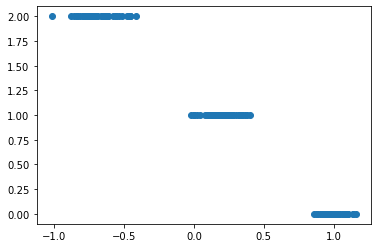

x2


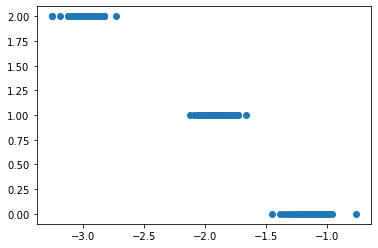

x3


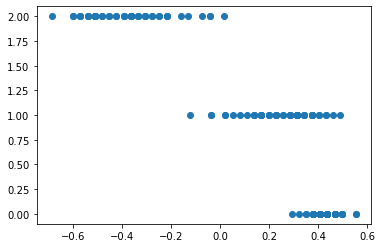

x4


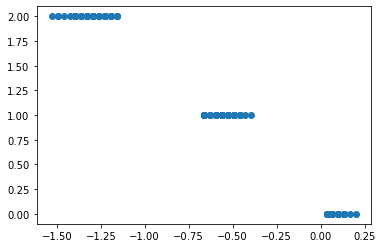

x5


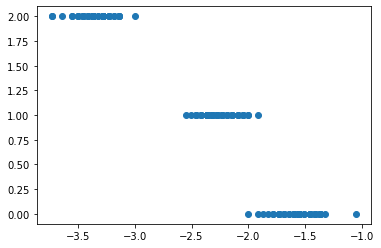

In [411]:
for i in X_train.columns:
    print (i)
    plt.scatter(df2[i], df2['y'])
    plt.show()

# because we have small dataset and features have strong correlations with dependet variable and the class labels are located next to each other we can use SVM, seem it looks like it can separate classes well and is suitable for a task with many classes.

In [402]:
from sklearn.svm import SVC

In [403]:
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)

In [404]:
svm_predictions = svm_model_linear.predict(X_test)

In [405]:
accuracy = svm_model_linear.score(X_test, y_test)
accuracy

1.0

# beacuse the class labels are located next to each other KNN is one of the best solution

In [406]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

accuracy = knn.score(X_test, y_test)

print (accuracy)

1.0


# Also we can try to use RandomForest but on this data seems it be easy to overfit model. But on this data we can't see what, so it be good choose. Even one dicision tree would be enough on this task.
# Also we can try Naive Bayes classifire if there were no multicollinearity in the data.